In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('schallwellen_in_wasser.csv')

df['x'] = df['T'] * np.exp(-1 * df['T'] / 86.9)

print(df.describe())

               T            c          x
count   6.000000     6.000000   6.000000
mean   12.500000  1495.333333  10.148931
std     9.354143    32.370769   7.028939
min     0.000000  1448.000000   0.000000
25%     6.250000  1475.500000   5.768573
50%    12.500000  1498.500000  10.767476
75%    18.750000  1518.500000  15.071711
max    25.000000  1534.000000  18.749908


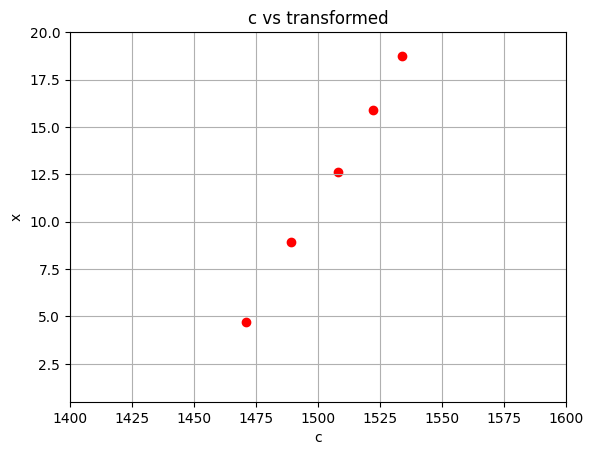

In [15]:
# print values as scatterplot

plt.xlim(1400, 1600)
plt.ylim(0.5, 20.0)

plt.xlabel('c')
plt.ylabel('x')
plt.title('c vs transformed')

plt.scatter(df['c'], df['x'], color='red')

plt.grid()

plt.show()

In [16]:
x_bar = np.mean(df['c'])
y_bar = np.mean(df['x'])

Sxx = np.sum((df['c'] - x_bar)**2)
Sxy = np.sum((df['c'] - x_bar)*(df['x'] - y_bar))

beta_1 = Sxy/Sxx

print('beta_1:', beta_1)

beta_1: 0.21705998203940133


In [17]:
model = smf.ols('c ~ x', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5531.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.96e-07
Time:                        18:07:14   Log-Likelihood:                -7.1324
No. Observations:                   6   AIC:                             18.26
Df Residuals:                       4   BIC:                             17.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1448.6108      0.743   1949.013      0.0

Parameter a = 1448.6108 and b = 4.6037